<a href="https://colab.research.google.com/github/ALRIER/Class2023/blob/March2023/Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rpy2[robjects,pandas]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("gapminder")
install.packages("dslabs")
install.packages("NHANES")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz3xDW0/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz3xDW0/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz3xDW0/downloaded_packages’



In [ ]:
%%R
library(gapminder)
library(dplyr)
library(dslabs)
library(NHANES)
data(NHANES)
data(heights)
data(murders)
data(gapminder)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union


Attaching package: ‘dslabs’



    gapminder




In [ ]:
%%R
ls()

[1] "gapminder" "heights"   "murders"   "NHANES"    "oecd"      "opec"     


In [ ]:
%%R 
print(murders%>%head())

       state abb region population total
1    Alabama  AL  South    4779736   135
2     Alaska  AK   West     710231    19
3    Arizona  AZ   West    6392017   232
4   Arkansas  AR  South    2915918    93
5 California  CA   West   37253956  1257
6   Colorado  CO   West    5029196    65


Ya tengo la base de datos murders en R, pero como este libro servirá para enseñar Python y R, voy a exrpotar las bases de datos a ámbos entornos para así poder usarlas a lo largo de la clase. 

Aquí les dejó la sentencia de código que me permite expoertar datos de un entorno a otro; esto puede ser útil para ustedes en un furuto cuando estén trabajando por su cuenta. 

In [ ]:
# Importa la base de datos murders desde R a Python
%R data(murders)
%R -o murders

In [ ]:
murders

,state,abb,region,population,total
1,Alabama,AL,2,4779736.0,135.0
2,Alaska,AK,4,710231.0,19.0
3,Arizona,AZ,4,6392017.0,232.0
4,Arkansas,AR,2,2915918.0,93.0
5,California,CA,4,37253956.0,1257.0
6,Colorado,CO,4,5029196.0,65.0
7,Connecticut,CT,1,3574097.0,97.0
8,Delaware,DE,2,897934.0,38.0
9,District of Columbia,DC,2,601723.0,99.0
10,Florida,FL,2,19687653.0,669.0


Esta es otra opción que no usaré ahora pero la dejo por si algún día la necesitan. 

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# Importa la base de datos murders de R
with ro.conversion.localconverter(ro.default_converter + pandas2ri.converter):
    murders = ro.r['murders']


In [ ]:
%R data(gapminder)
%R -o gapminder

In [ ]:
gapminder.head()

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1,1,1960,115.40,62.87,6.19,1636054.0,NaN,4,19
2,2,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,1,11
3,3,1960,208.00,35.98,7.32,5270844.0,NaN,1,10
4,4,1960,NaN,62.97,4.43,54681.0,NaN,2,2
5,5,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,2,15


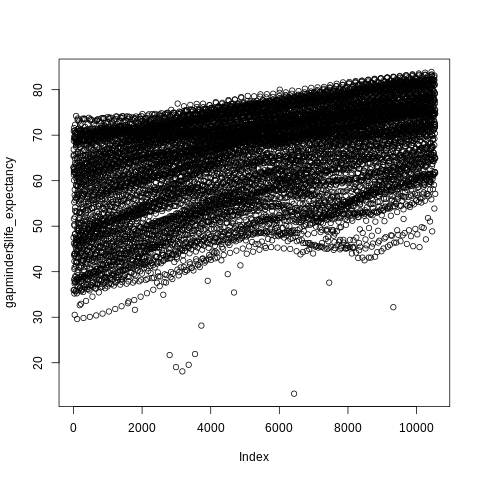

In [ ]:
%%R
#MAL
plot(gapminder$life_expectancy)

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

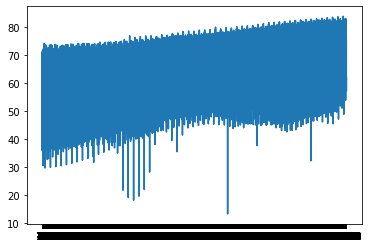

In [ ]:
# Convertir el dataset en un objeto de pandas en Python
gapminder = pd.DataFrame(gapminder)

# Graficar la variable "life_expectancy"
plt.plot(gapminder['life_expectancy'])
plt.show()

In [ ]:
#GGPLOT---------------------
#now lets learn the ggplot command to visualize data and learn
#how to use it in a propper way. 



#MAl
plot(gap$fertility)
#Buscar NA
sum(is.na(gapminder$infant_mortality))
#remplazar NA x 0
gapminder$infant_mortality[is.na(gapminder$infant_mortality)]<-0

hist(gap$year)
hist(gap$fertility)

boxplot(gap$population)
boxplot(gap$year)
mtcars
install.packages("psych")
Library("psych")
library("tidyverse")
plot(mtcars)
corPlot(cor(mtcars))
#Método 1
mtcars %>% 
   cor() %>% 
   corrplot(method = "circle",
            title = "circulos",
            tl.pos = "n", mar = c(2, 1, 3, 1))
#Método 2
mtcars %>% 
   cor() %>% 
   corrplot(method = "square", #método de gráfico
            title = "method = 'square'", #titulo impreso en pantalla
            tl.pos = "n",#posición del titulo
            mar = c(2, 1, 3, 1))#márgenes a usar
#Método 3
mtcars %>% 
   cor() %>% 
   corrplot(method = "color",
      title = "method = 'color'",
      tl.pos = "n", mar = c(2, 1, 3, 1)) 
#Método 4
mtcars %>% 
   cor() %>% 
   corrplot(method = "square",
            title = "method = 'square'")
#ggplot básico
library(ggplot2)
#el plot más básico. 
ggplot()
#???
ggplot(data = murders)
#???
murders %>% ggplot()
#guardemos el gráfico en un objeto y veamos su clase
p = ggplot(data = murders)
class(p)
print(p)
p
#GEOMETRIA------------
#geom_X ---> X será la geometría a usar en el gráfico. 
#ejemplo---> geom_point()

#ESTÉTICA------------- aesthetics
murders %>% 
   ggplot() +
   geom_point(aes(x = population, y = total))

#También podemos definir el objeto P que ya habíamos definido. 
p + geom_point(aes(population, total))

#Capas--------------
#ggplot(aes(X,Y, condición= variable))
p + geom_point(aes(population, total)) +
   geom_text(aes(population, total, label = abb))

#Más argumentos estéticos. 
#size, cambia el tamaño de las figuras, pero debe ir porfuera del primer
#argumento estético definido.
p + geom_point(aes(population, total), size = 3) +
   geom_text(aes(population, total, label = abb))
#mover el téxto para un u otro lado para hacerlo legible.
p + geom_point(aes(population, total), size = 3) +
   geom_text(aes(population, total, label = abb), nudge_x = 1.5)
# Mapeos estéticos globales versus locales------------
p <- murders %>% ggplot(aes(population/10^6, total, label = abb))
#ahora agreguemos capas y características. 
p + geom_point(size = 3) +
   geom_text(nudge_x = 1.5)
#Vamos a definir nuevas características locales...
#simplemente declaramos nuevos parámetros. 
p + geom_point(size = 3) +
   geom_text(aes(x = 10, y = 800, label = ":)"))

#Escalas------------
# Primero, las escalas que queremos están en escala logarítmica. 
# Este no es el valor predeterminado, por lo que este cambio debe añadirse 
# a través de una capa de escalas. 
# 
# La función scale_x_continuous nos permite controlar el 
# comportamiento de las escalas. La usamos así:
p + geom_point(size = 3) +
   geom_text(nudge_x = 0.05) +
   scale_x_continuous(trans = "log10") +
   scale_y_continuous(trans = "log10")
# Debido a que ahora estamos en la escala logarítmica, 
# el ajuste a la posición debe hacerse más pequeño en el plano gráfico.
# 
# Esta transformación particular es tan común que ggplot2 
# ofrece dos funciones especializadas scale_x_log10 y scale_y_log10, 
# que podemos usar para reescribir el código de esta manera:
p + geom_point(size = 3) +
   geom_text(nudge_x = 0.05) +
   scale_x_log10() +
   scale_y_log10()
#Etiquetas y títulos---------
p + geom_point(size = 3) +
   geom_text(nudge_x = 0.05) +
   scale_x_log10() +
   scale_y_log10() +
   xlab("población en millones") +
   ylab("Número total de muertes") +
   ggtitle("Muertes en US para el 2010")
#Categorías como colores----------------
p + geom_point(size = 3, color = "blue") +
   geom_text(nudge_x = 0.05) +
   scale_x_log10() +
   scale_y_log10() +
   xlab("población en millones") +
   ylab("Número total de muertes") +
   ggtitle("Muertes en US para el 2010")
#pero también podemos cambiar los colores según variables. 
p + geom_point(aes(col=region), size = 3) +
   geom_text(nudge_x = 0.05) +
   scale_x_log10() +
   scale_y_log10() +
   xlab("población en millones") +
   ylab("Número total de muertes") +
   ggtitle("Muertes en US para el 2010")